In [307]:
# load libraries and scripts
using PyPlot
using PyCall
using LaTeXStrings
include("../scripts/tools.jl")
include("../scripts/get_grid.jl")
include("../scripts/get_params.jl")
include("../scripts/stable.jl")
include("../scripts/dynamics.jl")
include("../scripts/disturbances.jl")
include("../scripts/ps_analysis.jl");

In [2]:
# create necessary paths
mkpath("../numerics");
mkpath("../figures");

In [3]:
# set plot variables
CMAP = :inferno;

In [206]:
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams");

In [209]:
# set-up plot font
rcParams["text.usetex"] = true
rcParams["font.family"] = "serif"
rcParams["font.serif"] = "Computer Modern Roman"

"Computer Modern Roman"

In [4]:
# load borders
border, scale_factor = import_border("../data/borders/border.json")

dx = 0.005
mesh = get_grid(border, dx); # renamed to be able to use the grid function for plotting

In [7]:
# compute or load grid parameters for different tau
tau1 = get_params(mesh, scale_factor, "../data/disc/pantagruel.h5", Niter=10,
    dmax = 2*dx, patch=1900.0, bmin=52.0, tau=1.0e-6);
tau2 = get_params(mesh, scale_factor, "../data/disc/pantagruel.h5", Niter=10,
    dmax = 2*dx, patch=1900.0, bmin=52.0, tau=5.0e-6);
tau3 = get_params(mesh, scale_factor, "../data/disc/pantagruel.h5", Niter=10,
    dmax = 2*dx, patch=1900.0, bmin=52.0, tau=5.0e-5);

  1.950306 seconds (529.68 k allocations: 16.811 GiB, 18.47% gc time)
  0.774289 seconds (3.87 k allocations: 1.011 GiB, 1.86% gc time)
  2.093836 seconds (529.79 k allocations: 16.811 GiB, 16.90% gc time)
  0.758780 seconds (3.87 k allocations: 1.011 GiB, 2.03% gc time)
  1.907510 seconds (529.79 k allocations: 16.811 GiB, 16.62% gc time)
  0.744081 seconds (3.87 k allocations: 1.011 GiB, 1.77% gc time)


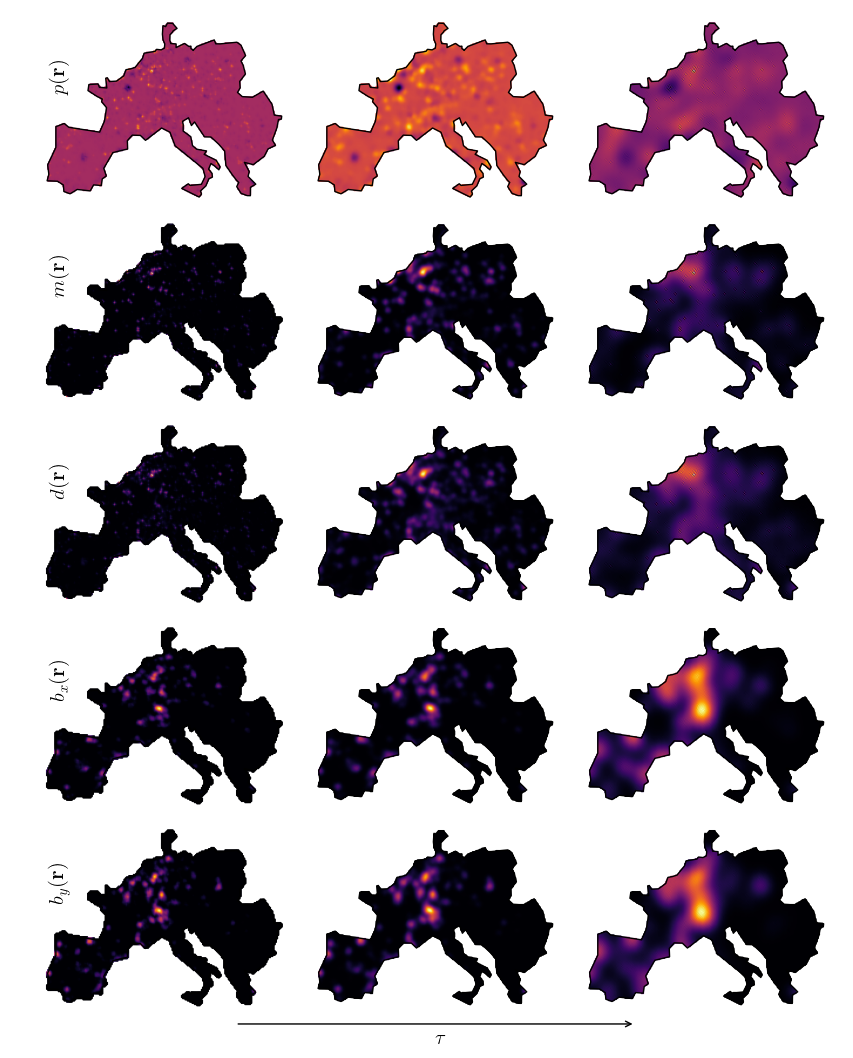

In [308]:
msize = 0.5
fig = plt.figure(figsize=(8,10))
gs = fig.add_gridspec(5,3)
# Turn off axis lines and ticks of the big subplot
wholefig = fig.add_subplot(py"$(gs)[:,:]")
wholefig.spines["top"].set_visible(false)
wholefig.spines["right"].set_visible(false)
wholefig.spines["bottom"].set_visible(false)
wholefig.spines["left"].set_visible(false)
wholefig.tick_params(labelcolor="white", top=false, bottom=false, left=false, right=false)
p11 = fig.add_subplot(gs[1,1])
p11.scatter(tau1.coord[tau1.isinside,2], tau1.coord[tau1.isinside,1], c=tau1.p[tau1.isinside[tau1.isgrid]], s=msize, cmap=CMAP)
p11.text(0.05, 0.6, "\$p(\\mathbf{r})\$", transform=p11.transAxes, rotation=90, fontsize=15)
p11.plot(border[:,1], border[:,2], "k", lw=1)
p11.set_aspect("equal")
p11.axis("off")
p12 = fig.add_subplot(gs[2,1])
p12.scatter(tau1.coord[tau1.isgrid,2], tau1.coord[tau1.isgrid,1], c=tau1.m[tau1.isgrid], s=msize, cmap=CMAP)
p12.text(0.05, 0.6, "\$m(\\mathbf{r})\$", transform=p12.transAxes, rotation=90, fontsize=15)
p12.plot(border[:,1], border[:,2], "k", lw=1)
p12.set_aspect("equal")
p12.axis("off")
p13 = fig.add_subplot(gs[3,1])
p13.scatter(tau1.coord[tau1.isgrid,2], tau1.coord[tau1.isgrid,1], c=tau1.d[tau1.isgrid], s=msize, cmap=CMAP)
p13.text(0.05, 0.6, "\$d(\\mathbf{r})\$", transform=p13.transAxes, rotation=90, fontsize=15)
p13.plot(border[:,1], border[:,2], "k", lw=1)
p13.set_aspect("equal")
p13.axis("off")
p14 = fig.add_subplot(gs[4,1])
p14.scatter(tau1.coord[tau1.isgrid,2], tau1.coord[tau1.isgrid,1], c=tau1.bx[tau1.isgrid], s=msize, cmap=CMAP)
p14.text(0.05, 0.6, "\$b_x(\\mathbf{r})\$", transform=p14.transAxes, rotation=90, fontsize=15)
p14.plot(border[:,1], border[:,2], "k", lw=1)
p14.set_aspect("equal")
p14.axis("off")
p15 = fig.add_subplot(gs[5,1])
p15.scatter(tau1.coord[tau1.isgrid,2], tau1.coord[tau1.isgrid,1], c=tau1.by[tau1.isgrid], s=msize, cmap=CMAP)
p15.text(0.05, 0.6, "\$b_y(\\mathbf{r})\$", transform=p15.transAxes, rotation=90, fontsize=15)
p15.plot(border[:,1], border[:,2], "k", lw=1)
p15.set_aspect("equal")
p15.axis("off")
p21 = fig.add_subplot(gs[1,2])
p21.scatter(tau2.coord[tau2.isinside,2], tau2.coord[tau2.isinside,1], c=tau2.p[tau2.isinside[tau2.isgrid]], s=msize, cmap=CMAP)
p21.plot(border[:,1], border[:,2], "k", lw=1)
p21.set_aspect("equal")
p21.axis("off")
p22 = fig.add_subplot(gs[2,2])
p22.scatter(tau1.coord[tau2.isinside,2], tau2.coord[tau2.isinside,1], c=tau2.m[tau2.isinside], s=msize, cmap=CMAP)
p22.plot(border[:,1], border[:,2], "k", lw=1)
p22.set_aspect("equal")
p22.axis("off")
p23 = fig.add_subplot(gs[3,2])
p23.scatter(tau1.coord[tau2.isinside,2], tau2.coord[tau2.isinside,1], c=tau2.d[tau2.isinside], s=msize, cmap=CMAP)
p23.plot(border[:,1], border[:,2], "k", lw=1)
p23.set_aspect("equal")
p23.axis("off")
p24 = fig.add_subplot(gs[4,2])
p24.scatter(tau1.coord[tau2.isinside,2], tau2.coord[tau2.isinside,1], c=tau2.bx[tau2.isinside], s=msize, cmap=CMAP)
p24.plot(border[:,1], border[:,2], "k", lw=1)
p24.set_aspect("equal")
p24.axis("off")
p25 = fig.add_subplot(gs[5,2])
p25.scatter(tau1.coord[tau2.isinside,2], tau2.coord[tau2.isinside,1], c=tau2.by[tau2.isinside], s=msize, cmap=CMAP)
p25.plot(border[:,1], border[:,2], "k", lw=1)
p25.set_aspect("equal")
p25.axis("off")
p31 = fig.add_subplot(gs[1,3])
p31.scatter(tau3.coord[tau3.isinside,2], tau3.coord[tau3.isinside,1], c=tau3.p[tau3.isinside[tau3.isgrid]], s=msize, cmap=CMAP)
p31.plot(border[:,1], border[:,2], "k", lw=1)
p31.set_aspect("equal")
p31.axis("off")
p32 = fig.add_subplot(gs[2,3])
p32.scatter(tau1.coord[tau3.isinside,2], tau3.coord[tau3.isinside,1], c=tau3.m[tau3.isinside], s=msize, cmap=CMAP)
p32.plot(border[:,1], border[:,2], "k", lw=1)
p32.set_aspect("equal")
p32.axis("off")
p33 = fig.add_subplot(gs[3,3])
p33.scatter(tau1.coord[tau3.isinside,2], tau3.coord[tau3.isinside,1], c=tau3.d[tau3.isinside], s=msize, cmap=CMAP)
p33.plot(border[:,1], border[:,2], "k", lw=1)
p33.set_aspect("equal")
p33.axis("off")
p34 = fig.add_subplot(gs[4,3])
p34.scatter(tau1.coord[tau3.isinside,2], tau3.coord[tau3.isinside,1], c=tau3.bx[tau3.isinside], s=msize, cmap=CMAP)
p34.plot(border[:,1], border[:,2], "k", lw=1)
p34.set_aspect("equal")
p34.axis("off")
p35 = fig.add_subplot(gs[5,3])
p35.scatter(tau1.coord[tau3.isinside,2], tau3.coord[tau3.isinside,1], c=tau3.by[tau3.isinside], s=msize, cmap=CMAP)
p35.plot(border[:,1], border[:,2], "k", lw=1)
p35.set_aspect("equal")
p35.axis("off")
wholefig.annotate("", xy=(0.75, -0.01), xycoords="axes fraction", xytext=(0.25, -0.01),
            arrowprops=Dict([("arrowstyle","->"), ("color","k")]))
wholefig.text(0.5, -0.03, "\$\\tau\$", transform=wholefig.transAxes, fontsize=15)
plt.subplots_adjust(left=0.0, right=1.0, top=1.0, bottom=0.0, wspace=0.05, hspace=0.05)
# fig.tight_layout()
fig.savefig("../figures/fig1.pdf", bbox_inches="tight")

In [109]:
# compute or load grid parameters
contmod = get_params(mesh, scale_factor, "../data/disc/pantagruel.h5", Niter=10,
    dmax = 2*dx, patch=1900.0, bmin=52.0, tau=5.0e-7);

  1.970546 seconds (529.69 k allocations: 16.811 GiB, 13.85% gc time)
  0.743782 seconds (3.87 k allocations: 1.011 GiB, 1.57% gc time)


In [110]:
# get stable solution
compute_stable_sol!(contmod, interval = 10000, Niter = 250000, tol = 1e-7);
dm = load_discrete_model("../data/disc/pantagruel.h5", scale_factor);
th_disc = get_discrete_values(contmod.coord[contmod.isgrid,:], dm.coord, contmod.th[contmod.isgrid]);

[10000.0 0.00010416045882966074]
[20000.0 3.7917249033458944e-5]
[30000.0 1.996525850800346e-5]
[40000.0 1.6063909394237186e-5]
[50000.0 1.3632095115512222e-5]
[60000.0 1.2123369674488238e-5]
[70000.0 1.1182291970057712e-5]
[80000.0 1.0591429919437623e-5]
[90000.0 1.0218437711095874e-5]
[100000.0 9.982054374413352e-6]
[110000.0 9.831848279073796e-6]
[120000.0 9.736236782464935e-6]
[130000.0 9.675309562418022e-6]
[140000.0 9.636457606099214e-6]
[150000.0 9.611671920040088e-6]
[160000.0 9.595855643529383e-6]
[170000.0 9.585761294839124e-6]
[180000.0 9.579318181573981e-6]
[190000.0 9.575205360823347e-6]
[200000.0 9.57257993228211e-6]
[210000.0 9.570903946487519e-6]
[220000.0 9.569834037881364e-6]
[230000.0 9.569151028565592e-6]
[240000.0 9.568715006347261e-6]
[250000.0 9.56843665422813e-6]
 17.330631 seconds (2.26 M allocations: 81.680 GiB, 6.73% gc time)


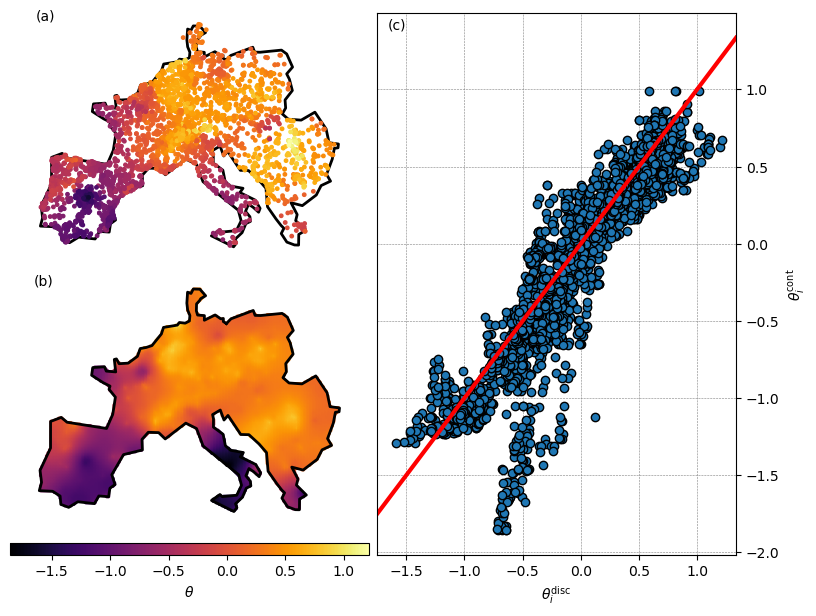

In [105]:
# Create fig. 2
contcols = fill!(Vector{Float64}(undef, contmod.Ny * contmod.Nx), NaN)
contcols[contmod.isinside] = contmod.th[contmod.isinside]
thmin = minimum(dm.th)
thmax = maximum(dm.th)
clim = extrema([dm.th;th_disc])
fig = plt.figure(constrained_layout=true, figsize=(8,6))
gs = fig.add_gridspec(3,2, height_ratios=[1,1,0.05], width_ratios=[1,1])
p1 = fig.add_subplot(gs[1,1], label="(a)")
p1.plot(border[:,1], border[:,2], "k", zorder=0, lw=2)
p1.scatter(dm.coord[:,2], dm.coord[:,1], c=dm.th, cmap=CMAP, zorder=1, vmin=clim[1], vmax=clim[2], s=6)
p1.set_aspect("equal")
p1.axis("off")
p1.text(0.03,0.97, "(a)", transform=p1.transAxes)
p2 = fig.add_subplot(gs[2,1])
p2.scatter(contmod.coord[:,2], contmod.coord[:,1], c=contcols, cmap=CMAP, s=3, vmin=clim[1], vmax=clim[2])
p2.plot(border[:,1], border[:,2], "k", lw=2)
p2.set_aspect("equal")
p2.axis("off")
p2.text(0.03,0.97, "(b)", transform=p2.transAxes)
cbarax = fig.add_subplot(gs[3,1])
plt.colorbar(p1.collections[1], cax=cbarax.axes, orientation="horizontal", label="\$\\theta\$")
p3 = fig.add_subplot(py"$(gs)[:,1]") # Careful, when using PyCall the arrays have to be 0 indexed!
p3.scatter(dm.th, th_disc, edgecolors="k")
p3.grid(color="gray", linestyle="dashed", lw=0.4)
p3.set_axisbelow(true)
p3.plot([1.1*thmin, 1.1*thmax], [1.1*thmin, 1.1*thmax], "r", lw=3)
p3.set_xlim(1.1*thmin, 1.1*thmax)
p3.set_xlabel("\$\\theta_i^{\\rm disc}\$")
p3.set_ylabel("\$\\theta_i^{\\rm cont}\$")
p3.yaxis.tick_right()
p3.yaxis.set_label_position("right")
p3.text(0.03,0.97, "(c)", transform=p3.transAxes);
plt.savefig("../figures/fig2.pdf")

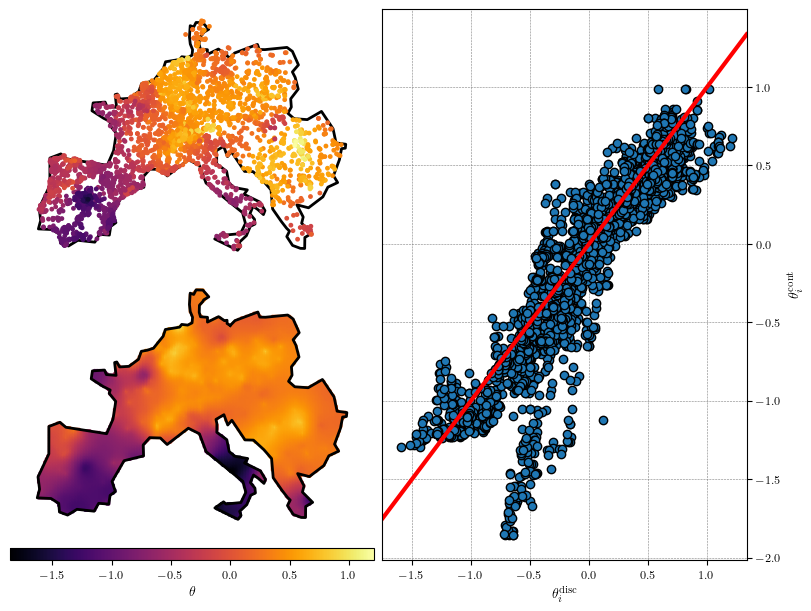

In [221]:
# Create fig. 2 without labels
contcols = fill!(Vector{Float64}(undef, contmod.Ny * contmod.Nx), NaN)
contcols[contmod.isinside] = contmod.th[contmod.isinside]
thmin = minimum(dm.th)
thmax = maximum(dm.th)
clim = extrema([dm.th;th_disc])
fig = plt.figure(constrained_layout=true, figsize=(8,6))
gs = fig.add_gridspec(3,2, height_ratios=[1,1,0.05], width_ratios=[1,1])
p1 = fig.add_subplot(gs[1,1], label="(a)")
p1.plot(border[:,1], border[:,2], "k", zorder=0, lw=2)
p1.scatter(dm.coord[:,2], dm.coord[:,1], c=dm.th, cmap=CMAP, zorder=1, vmin=clim[1], vmax=clim[2], s=6)
p1.set_aspect("equal")
p1.axis("off")
# p1.text(0.03,0.97, "(a)", transform=p1.transAxes)
p2 = fig.add_subplot(gs[2,1])
p2.scatter(contmod.coord[:,2], contmod.coord[:,1], c=contcols, cmap=CMAP, s=3, vmin=clim[1], vmax=clim[2])
p2.plot(border[:,1], border[:,2], "k", lw=2)
p2.set_aspect("equal")
p2.axis("off")
# p2.text(0.03,0.97, "(b)", transform=p2.transAxes)
cbarax = fig.add_subplot(gs[3,1])
plt.colorbar(p1.collections[1], cax=cbarax.axes, orientation="horizontal", label="\$\\theta\$")
p3 = fig.add_subplot(py"$(gs)[:,1]") # Careful, when using PyCall the arrays have to be 0 indexed!
p3.scatter(dm.th, th_disc, edgecolors="k")
p3.grid(color="gray", linestyle="dashed", lw=0.4)
p3.set_axisbelow(true)
p3.plot([1.1*thmin, 1.1*thmax], [1.1*thmin, 1.1*thmax], "r", lw=3)
p3.set_xlim(1.1*thmin, 1.1*thmax)
p3.set_xlabel("\$\\theta_i^{\\rm disc}\$")
p3.set_ylabel("\$\\theta_i^{\\rm cont}\$")
p3.yaxis.tick_right()
p3.yaxis.set_label_position("right")
# p3.text(0.03,0.97, "(c)", transform=p3.transAxes);
plt.savefig("../figures/fig2nolabels.pdf")

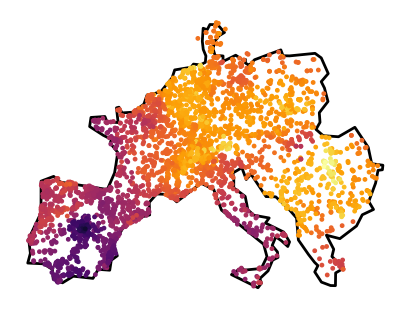

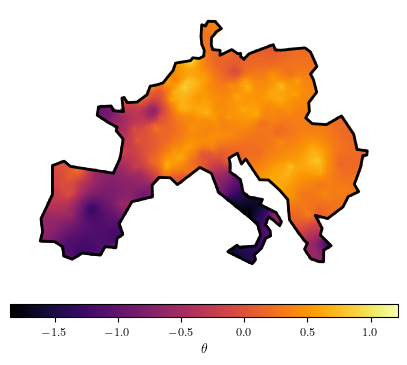

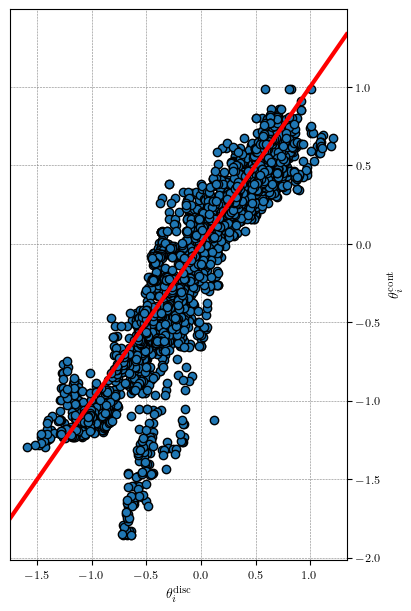

sys:1: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
sys:1: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.


In [220]:
# Create fig. 2 without labels
contcols = fill!(Vector{Float64}(undef, contmod.Ny * contmod.Nx), NaN)
contcols[contmod.isinside] = contmod.th[contmod.isinside]
thmin = minimum(dm.th)
thmax = maximum(dm.th)
clim = extrema([dm.th;th_disc])
fig1= plt.figure(constrained_layout=true, figsize=(4,3))
ax1 = fig1.add_subplot(111)
ax1.plot(border[:,1], border[:,2], "k", zorder=0, lw=2)
ax1.scatter(dm.coord[:,2], dm.coord[:,1], c=dm.th, cmap=CMAP, zorder=1, vmin=clim[1], vmax=clim[2], s=6)
ax1.set_aspect("equal")
ax1.axis("off")
fig1.savefig("../figures/fig2a.pdf")

fig2= plt.figure(constrained_layout=true, figsize=(5,4))
gs = fig.add_gridspec(2,1, height_ratios=[1,0.05])
ax2 = fig2.add_subplot(gs[1,1])
ax2.scatter(contmod.coord[:,2], contmod.coord[:,1], c=contcols, cmap=CMAP, s=3, vmin=clim[1], vmax=clim[2])
ax2.plot(border[:,1], border[:,2], "k", lw=2)
ax2.set_aspect("equal")
ax2.axis("off")
cbarax = fig2.add_subplot(gs[2,1])
plt.colorbar(ax2.collections[1], cax=cbarax.axes, orientation="horizontal", label="\$\\theta\$")
fig2.savefig("../figures/fig2b.pdf")

fig3 = plt.figure(constrained_layout=true, figsize=(4,6))
ax3 = fig3.add_subplot(111) # Careful, when using PyCall the arrays have to be 0 indexed!
ax3.scatter(dm.th, th_disc, edgecolors="k")
ax3.grid(color="gray", linestyle="dashed", lw=0.4)
ax3.set_axisbelow(true)
ax3.plot([1.1*thmin, 1.1*thmax], [1.1*thmin, 1.1*thmax], "r", lw=3)
ax3.set_xlim(1.1*thmin, 1.1*thmax)
ax3.set_xlabel(L"$\theta_i^{\rm disc}$")
ax3.set_ylabel(L"$\theta_i^{\rm cont}$")
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position("right")
fig3.savefig("../figures/fig2c.pdf")

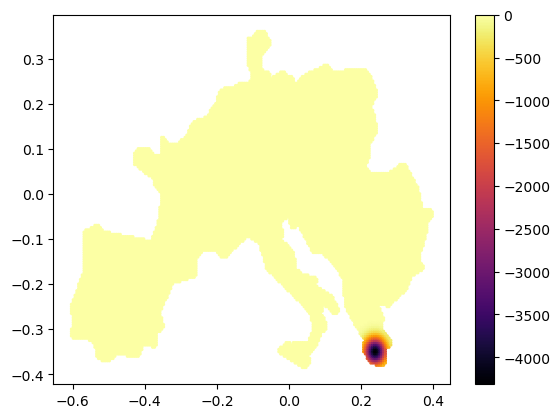

PyObject <matplotlib.colorbar.Colorbar object at 0x1f67d06d0>

In [111]:
# Add perturbation around generator 1
# Run only ONCE as it directly changes the distribution of p!
dp = add_local_disturbance!(contmod, dm.coord[1,:], -9.0, 0.02, dx);
dpf = fill!(Vector{Float64}(undef, contmod.Ny * contmod.Nx), NaN)
dpf[contmod.isgrid] = dp;
dpp = plt.scatter(contmod.coord[:,2], contmod.coord[:,1], c=dpf, s=2, cmap=CMAP)
plt.colorbar(dpp)

In [123]:
ts, thetas, omegas = perform_dyn_sim(contmod, interval=1,
    Ndt=2500, dt=0.01, method="crank-nicolson");

Total time: 25.0
NIter: 1 Avg. Omega: -0.004130010535201552
NIter: 2 Avg. Omega: -0.007318783803053515
NIter: 3 Avg. Omega: -0.009638843812729038
NIter: 4 Avg. Omega: -0.011185220025424056
NIter: 5 Avg. Omega: -0.011807612513377539
NIter: 6 Avg. Omega: -0.011765964164647454
NIter: 7 Avg. Omega: -0.011468368220038066
NIter: 8 Avg. Omega: -0.011178566844494914
NIter: 9 Avg. Omega: -0.011079717579293618
NIter: 10 Avg. Omega: -0.011299299914039267
NIter: 11 Avg. Omega: -0.011892245855342994
NIter: 12 Avg. Omega: -0.012713208310125342
NIter: 13 Avg. Omega: -0.013558387018686465
NIter: 14 Avg. Omega: -0.014366322570997297
NIter: 15 Avg. Omega: -0.015070523276189855
NIter: 16 Avg. Omega: -0.015484952026030318
NIter: 17 Avg. Omega: -0.015597556876160932
NIter: 18 Avg. Omega: -0.015687575973671115
NIter: 19 Avg. Omega: -0.01600261393738075
NIter: 20 Avg. Omega: -0.01667207398852707
NIter: 21 Avg. Omega: -0.017834792484826265
NIter: 22 Avg. Omega: -0.019484826301303045
NIter: 23 Avg. Omega: -0.0

In [218]:
fid = h5open("../numerics/cont_results.h5", "w")
write(fid, "omegas", omegas)
write(fid, "ts", ts)
close(fid)

In [124]:
referencepoints=[[-0.5 -0.2];[-0.2 0.0];[0.1 0.1];[0.25 -0.15]] #(x,y) coordinates
refids = zeros(Int64, 4)
for i=1:4
    refids[i] = argmin((contmod.coord[contmod.isgrid,2].-referencepoints[i,1]).^2 .+ (contmod.coord[contmod.isgrid,1].-referencepoints[i,2]).^2)
end

In [125]:
disres = h5read("../numerics/disc_results.h5","/")
omdis = disres["omegas"]
idgen = disres["idgen"]
tdis = disres["ts"];

In [126]:
referencepoints=[[-0.5 -0.2];[-0.2 0.0];[0.1 0.1];[0.25 -0.15]] #(x,y) coordinates
refgens = zeros(Int64, 4) # To get the frequencies
refgensco = zeros(Int64, 4) # to get the coordinates
for i=1:4
    refgens[i] = argmin((dm.coord[idgen,2].-referencepoints[i,1]).^2 .+ (dm.coord[idgen,1].-referencepoints[i,2]).^2)
    refgensco[i] = idgen[argmin((dm.coord[idgen,2].-referencepoints[i,1]).^2 .+ (dm.coord[idgen,1].-referencepoints[i,2]).^2)]
end

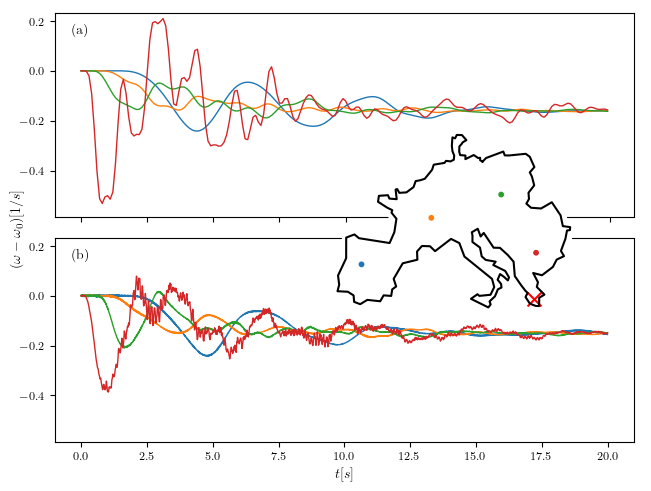

In [211]:
tend = 20.0
ymax = 1.1 * maximum([maximum(omdis[refgens,:]) maximum(omegas[refids,:])])
ymin = 1.1 * minimum([minimum(omdis[refgens,:]) minimum(omegas[refids,:])])
fig = plt.figure(constrained_layout=true)
gs = fig.add_gridspec(2,1)
# Turn off axis lines and ticks of the big subplot
wholefig = fig.add_subplot(py"$(gs)[:,:]")
wholefig.spines["top"].set_visible(false)
wholefig.spines["right"].set_visible(false)
wholefig.spines["bottom"].set_visible(false)
wholefig.spines["left"].set_visible(false)
wholefig.tick_params(labelcolor="white", top=false, bottom=false, left=false, right=false)
p1 = fig.add_subplot(gs[1,1])
stepdis = 1
if(tend != 0.0)
    idenddis = findall(tdis .< tend)[end]
else
    idenddis = length(tdis) 
end
p1.plot(tdis[1:stepdis:idenddis], omdis[refgens, 1:stepdis:idenddis]', lw=1)
p1.set_ylim(ymin, ymax)
p1.text(0.03,0.9, "(a)", transform=p1.transAxes)
plt.setp(p1.get_xticklabels(), visible=false)
p2 = fig.add_subplot(gs[2,1])
stepcon = 1
if(tend != 0.0)
    idendcon = findall(ts .< tend)[end]
else
    idendcon = length(ts) 
end
p2.plot(ts[1:stepcon:idendcon], omegas[refids, 1:stepcon:idendcon]', lw=1)
p2.set_ylim(ymin, ymax)
p2.set_xlabel("\$t[s]\$")
p2.text(0.03,0.9, "(b)", transform=p2.transAxes)
inset = fig.add_axes([0.5, 0.35, 0.4, 0.4])
inset.plot(border[:,1], border[:,2], "k")
inset.scatter(contmod.coord[contmod.isinside,2], contmod.coord[contmod.isinside,1],s=50,c="white")
inset.scatter(referencepoints[:,1], referencepoints[:,2],s=10, c=["tab:blue", "tab:orange", "tab:green", "tab:red"])
inset.scatter(dm.coord[1,2], dm.coord[1,1],s=100, marker="x", c="r") # Fault location
inset.set_aspect("equal")
# inset.xaxis.set_ticklabels([])
# inset.yaxis.set_ticklabels([])
# inset.spines["top"].set_visible(false)
# inset.spines["right"].set_visible(false)
# inset.spines["bottom"].set_visible(false)
# inset.spines["left"].set_visible(false)
# inset.tick_params(top=false, bottom=false, left=false, right=false)
inset.axis("off")
wholefig.set_ylabel("\$(\\omega-\\omega_0)[1/s]\$");
plt.savefig("../figures/fig3.pdf")

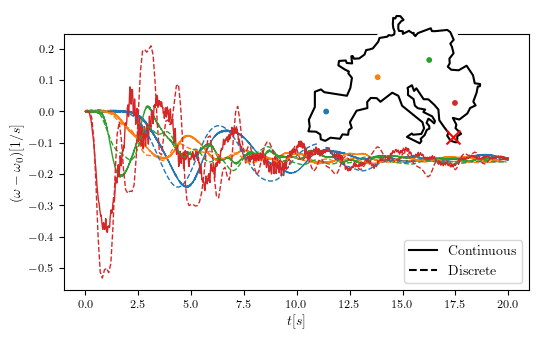

In [240]:
lines = [matplotlib.lines.Line2D([0],[0],c="k"), matplotlib.lines.Line2D([0],[0],c="k",ls="--")]
fig = plt.figure(figsize=(6,3.5))
plt.plot(ts[1:idendcon], omegas[refids, 1:idendcon]', lw=1)
plt.gca().set_prop_cycle(py"None")
plt.plot(tdis[1:idenddis], omdis[refgens, 1:idenddis]', lw=1, ls="--")
plt.legend(lines, ["Continuous", "Discrete"], loc="lower right")
plt.xlabel(L"t[s]", fontname="serif")
plt.ylabel(L"(\omega-\omega_0)[1/s]")
inset = fig.add_axes([0.5, 0.55, 0.35, 0.4])
inset.plot(border[:,1], border[:,2], "k")
inset.scatter(contmod.coord[contmod.isinside,2], contmod.coord[contmod.isinside,1],s=50,c="white")
inset.set_aspect("equal")
inset.scatter(referencepoints[:,1], referencepoints[:,2],s=10, c=["tab:blue", "tab:orange", "tab:green", "tab:red"])
inset.scatter(dm.coord[1,2], dm.coord[1,1],s=100, marker="x", c="r",zorder=10) # Fault location
# inset.xaxis.set_ticklabels([])
# inset.yaxis.set_ticklabels([])
# inset.spines["top"].set_visible(false)
# inset.spines["right"].set_visible(false)
# inset.spines["bottom"].set_visible(false)
# inset.spines["left"].set_visible(false)
# inset.tick_params(top=false, bottom=false, left=false, right=false)
inset.axis("off")
plt.subplots_adjust(bottom=0.15)

plt.savefig("../figures/fig3new.pdf")

In [176]:
matplotlib.lines.Line2D([0],[0])

PyObject <matplotlib.lines.Line2D object at 0x1f805f460>

In [196]:
maximum(border[:,2])-minimum(border[:,2])

0.7412190824880003

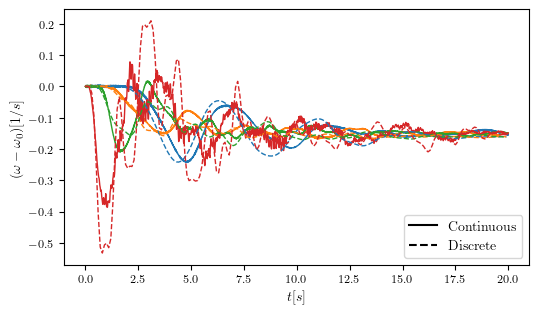

In [239]:
lines = [matplotlib.lines.Line2D([0],[0],c="k"), matplotlib.lines.Line2D([0],[0],c="k",ls="--")]
fig = plt.figure(figsize=(6,3.5))
plt.plot(ts[1:idendcon], omegas[refids, 1:idendcon]', lw=1)
plt.gca().set_prop_cycle(py"None")
plt.plot(tdis[1:idenddis], omdis[refgens, 1:idenddis]', lw=1, ls="--")
plt.legend(lines, ["Continuous", "Discrete"], loc="lower right")
plt.xlabel(L"t[s]", fontname="serif")
plt.ylabel(L"(\omega-\omega_0)[1/s]")
# inset = fig.add_axes([0.5, 0.55, 0.35, 0.4])
# inset.plot(border[:,1], border[:,2], "k")
# inset.scatter(contmod.coord[contmod.isinside,2], contmod.coord[contmod.isinside,1],s=50,c="white")
# inset.set_aspect("equal")
# inset.scatter(referencepoints[:,1], referencepoints[:,2],s=10, c=["tab:blue", "tab:orange", "tab:green", "tab:red"])
# inset.scatter(dm.coord[1,2], dm.coord[1,1],s=100, marker="x", c="r",zorder=10) # Fault location
# # inset.xaxis.set_ticklabels([])
# inset.yaxis.set_ticklabels([])
# inset.spines["top"].set_visible(false)
# inset.spines["right"].set_visible(false)
# inset.spines["bottom"].set_visible(false)
# inset.spines["left"].set_visible(false)
# inset.tick_params(top=false, bottom=false, left=false, right=false)
# inset.axis("off")
# plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.savefig("../figures/fig3noinset.pdf")

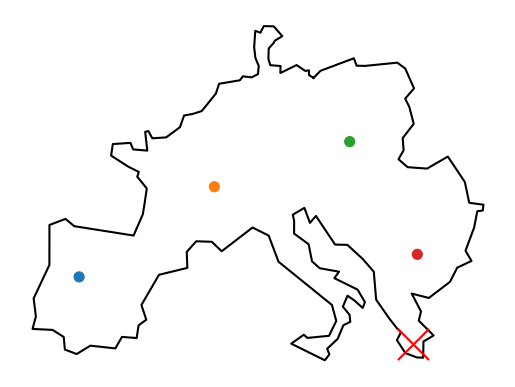

In [233]:
fig, ax = plt.subplots(1)
ax.plot(border[:,1], border[:,2], "k")
ax.scatter(contmod.coord[contmod.isinside,2], contmod.coord[contmod.isinside,1],s=50,c="white")
ax.set_aspect("equal")
ax.scatter(referencepoints[:,1], referencepoints[:,2],s=50, c=["tab:blue", "tab:orange", "tab:green", "tab:red"])
ax.scatter(dm.coord[1,2], dm.coord[1,1],s=500, marker="x", c="r",zorder=10) # Fault location
# inset.xaxis.set_ticklabels([])
# plt.yaxis.set_ticklabels([])
# plt.spines["top"].set_visible(false)
# plt.spines["right"].set_visible(false)
# inset.spines["bottom"].set_visible(false)
# inset.spines["left"].set_visible(false)
# inset.tick_params(top=false, bottom=false, left=false, right=false)
ax.axis("off")
plt.savefig("../figures/fig3inset.pdf")

In [299]:
test = fft(reshape(tau3.m,tau3.Ny,tau3.Nx));

In [300]:
freq = zeros(tau3.Ny, tau3.Nx)
freqx = fftfreq(tau3.Nx, dx)
freqy = fftfreq(tau3.Ny, dx)
for i=1:tau3.Ny
    for j=1:tau3.Nx
        freq[i, j] = sqrt(freqy[i]^2 + freqx[j]^2)
    end
end

In [301]:
filter = freq .< .5 * maximum(freq);

In [302]:
test[.!filter] .= 0;

In [304]:
test2 = real.(ifft(test))
test2[.!tau3.isgrid] .= 0.0;

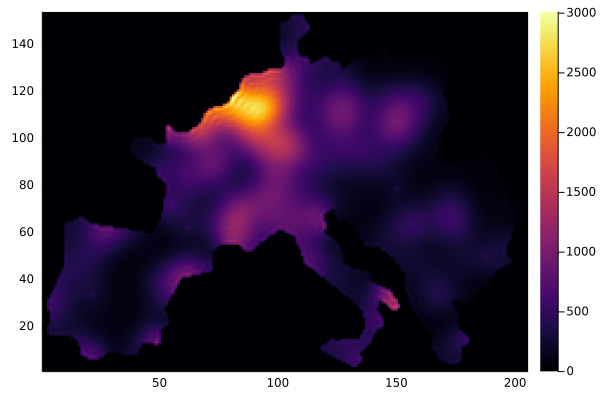

In [305]:
heatmap(real.(test2))

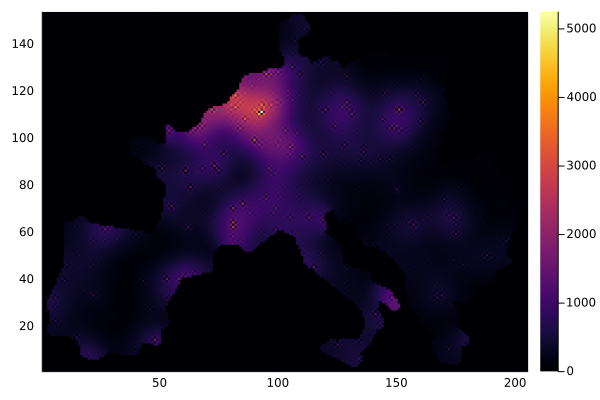

In [306]:
heatmap(reshape(tau3.m, tau3.Ny, tau3.Nx))